In [1]:
# Install other dependencies
!pip install cellection==0.1.1
# Install PyTorch 2.4.1
!pip install torch==2.4.1 torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 825.4/825.4 kB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 123.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Import packages and data

In [2]:
import cellection
import scanpy as sc
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
print(torch.cuda.is_available())

True


In [8]:
file_id = '1-VdTJSIvzbTuF2HH2EgIgwcomzkUJc9l'
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'covid_Ziegler_processed.h5ad', quiet=False)
adata = sc.read_h5ad('covid_Ziegler_processed.h5ad')

Downloading...
From: https://drive.google.com/uc?id=1-VdTJSIvzbTuF2HH2EgIgwcomzkUJc9l
To: /content/covid_Ziegler_processed.h5ad
100%|██████████| 64.3M/64.3M [00:00<00:00, 134MB/s]


In [9]:
adata.obs[['disease__ontology_label','donor_id']].value_counts().sort_index()
adata.obs['disease_id'] = 'control'
# COVID-19 and long COVID-19 to 'case'
adata.obs.loc[adata.obs['disease__ontology_label'] == 'COVID-19', 'disease_id'] = 'case'
adata.obs.loc[adata.obs['disease__ontology_label'] == 'long COVID-19', 'disease_id'] = 'case'
adata.obs.loc[adata.obs['disease__ontology_label'] == 'respiratory failure', 'disease_id'] = 'case'
adata.obs.disease_id.value_counts()

,count
disease_id,
case,23714
control,8874


## Prepare the cellection object

In [14]:
obj_test = cellection.cellectiion_object(
    adata=adata,
    task_type='classification',
    task_key='disease_id',
    sample_key='donor_id',
    batch_key=None,
    model_type='classification',
    input_type='measurement',
    sparse_input=True,
    InstanceEncoder=True,
    val_size=0.2,
    aggregator='gated_attention',
    global_features=128,
    attention_dim=32,
    max_epochs=200,
    learning_rate=1e-4,
    batch_size=2,
    seed=2,
    device=torch.device("cuda" if torch.cuda.is_available() else "cpu"),
    hidden_layer=[256, 32],
    activation=nn.ReLU(),
    layernorm=True,
    batchnorm=False,
    dropout_rate=0.1,
    save_model=True,
    save_path=None
)
obj_test.prepare()

Number of bags: 58 Number of labels: (58, 2) Number of max instances: 2140


## Optimize cellection model

In [15]:
obj_test.train()

  0%|          | 1/200 [00:01<03:33,  1.08s/it]

Epoch [1/200], Train Loss: 0.7665
Epoch [1/200], Val Loss: 0.7034
Saving the best model with validation loss: 0.7034


  1%|          | 2/200 [00:01<03:12,  1.03it/s]

Epoch [2/200], Train Loss: 0.6690
Epoch [2/200], Val Loss: 0.7147


  2%|▏         | 3/200 [00:02<03:04,  1.07it/s]

Epoch [3/200], Train Loss: 0.6669
Epoch [3/200], Val Loss: 0.7188


  2%|▏         | 4/200 [00:03<02:59,  1.09it/s]

Epoch [4/200], Train Loss: 0.6650
Epoch [4/200], Val Loss: 0.7216


  2%|▎         | 5/200 [00:04<03:07,  1.04it/s]

Epoch [5/200], Train Loss: 0.6854
Epoch [5/200], Val Loss: 0.7019
Saving the best model with validation loss: 0.7019


  3%|▎         | 6/200 [00:05<03:16,  1.01s/it]

Epoch [6/200], Train Loss: 1.5916
Epoch [6/200], Val Loss: 0.7230


  4%|▎         | 7/200 [00:07<03:22,  1.05s/it]

Epoch [7/200], Train Loss: 0.7033
Epoch [7/200], Val Loss: 0.7093


  4%|▍         | 8/200 [00:07<03:15,  1.02s/it]

Epoch [8/200], Train Loss: 0.6943
Epoch [8/200], Val Loss: 0.6708
Saving the best model with validation loss: 0.6708


  4%|▍         | 9/200 [00:08<03:07,  1.02it/s]

Epoch [9/200], Train Loss: 2.6132
Epoch [9/200], Val Loss: 0.7289


  5%|▌         | 10/200 [00:09<03:02,  1.04it/s]

Epoch [10/200], Train Loss: 0.6280
Epoch [10/200], Val Loss: 0.7285


  6%|▌         | 11/200 [00:10<02:59,  1.06it/s]

Epoch [11/200], Train Loss: 0.7385
Epoch [11/200], Val Loss: 0.7432


  6%|▌         | 12/200 [00:11<02:56,  1.07it/s]

Epoch [12/200], Train Loss: 0.6275
Epoch [12/200], Val Loss: 0.7265


  6%|▋         | 13/200 [00:12<02:54,  1.07it/s]

Epoch [13/200], Train Loss: 1.3743
Epoch [13/200], Val Loss: 0.7477


  7%|▋         | 14/200 [00:13<02:56,  1.05it/s]

Epoch [14/200], Train Loss: 0.6293
Epoch [14/200], Val Loss: 0.6616
Saving the best model with validation loss: 0.6616


  8%|▊         | 15/200 [00:14<02:57,  1.04it/s]

Epoch [15/200], Train Loss: 0.6382
Epoch [15/200], Val Loss: 0.5844
Saving the best model with validation loss: 0.5844


  8%|▊         | 16/200 [00:15<02:53,  1.06it/s]

Epoch [16/200], Train Loss: 0.6269
Epoch [16/200], Val Loss: 0.5827
Saving the best model with validation loss: 0.5827


  8%|▊         | 17/200 [00:16<02:50,  1.08it/s]

Epoch [17/200], Train Loss: 0.6345
Epoch [17/200], Val Loss: 0.6435


  9%|▉         | 18/200 [00:17<02:54,  1.04it/s]

Epoch [18/200], Train Loss: 0.6267
Epoch [18/200], Val Loss: 0.6070


 10%|▉         | 19/200 [00:18<03:02,  1.01s/it]

Epoch [19/200], Train Loss: 0.6267
Epoch [19/200], Val Loss: 0.7596


 10%|█         | 20/200 [00:19<02:55,  1.03it/s]

Epoch [20/200], Train Loss: 0.6267
Epoch [20/200], Val Loss: 0.6477


 10%|█         | 21/200 [00:20<02:48,  1.06it/s]

Epoch [21/200], Train Loss: 0.6307
Epoch [21/200], Val Loss: 0.5977


 11%|█         | 22/200 [00:21<02:43,  1.09it/s]

Epoch [22/200], Train Loss: 1.1941
Epoch [22/200], Val Loss: 0.7271


 12%|█▏        | 23/200 [00:21<02:41,  1.10it/s]

Epoch [23/200], Train Loss: 0.6273
Epoch [23/200], Val Loss: 0.6872


 12%|█▏        | 24/200 [00:22<02:36,  1.13it/s]

Epoch [24/200], Train Loss: 0.6270
Epoch [24/200], Val Loss: 0.6401


 12%|█▎        | 25/200 [00:23<02:35,  1.12it/s]

Epoch [25/200], Train Loss: 0.6301
Epoch [25/200], Val Loss: 0.6948


 13%|█▎        | 26/200 [00:24<02:35,  1.12it/s]

Epoch [26/200], Train Loss: 0.6268
Epoch [26/200], Val Loss: 0.6108


 14%|█▎        | 27/200 [00:25<02:35,  1.11it/s]

Epoch [27/200], Train Loss: 0.6266
Epoch [27/200], Val Loss: 0.7296


 14%|█▍        | 28/200 [00:26<02:35,  1.11it/s]

Epoch [28/200], Train Loss: 0.6267
Epoch [28/200], Val Loss: 0.7483


 14%|█▍        | 29/200 [00:27<02:35,  1.10it/s]

Epoch [29/200], Train Loss: 0.6292
Epoch [29/200], Val Loss: 0.6607


 15%|█▌        | 30/200 [00:28<02:30,  1.13it/s]

Epoch [30/200], Train Loss: 0.6266
Epoch [30/200], Val Loss: 0.6185


 16%|█▌        | 31/200 [00:29<02:34,  1.09it/s]

Epoch [31/200], Train Loss: 0.6266
Epoch [31/200], Val Loss: 0.6221


 16%|█▌        | 32/200 [00:30<02:39,  1.05it/s]

Epoch [32/200], Train Loss: 0.6266
Epoch [32/200], Val Loss: 0.7900


 16%|█▋        | 33/200 [00:31<02:41,  1.04it/s]

Epoch [33/200], Train Loss: 0.6274
Epoch [33/200], Val Loss: 0.7343


 17%|█▋        | 34/200 [00:32<02:32,  1.09it/s]

Epoch [34/200], Train Loss: 0.6266
Epoch [34/200], Val Loss: 0.7822


 18%|█▊        | 35/200 [00:32<02:31,  1.09it/s]

Epoch [35/200], Train Loss: 0.6266
Epoch [35/200], Val Loss: 0.7302


 18%|█▊        | 35/200 [00:33<02:39,  1.03it/s]

Epoch [36/200], Train Loss: 0.6287
Epoch [36/200], Val Loss: 0.7302
Early stopping at epoch 36



/usr/local/lib/python3.11/dist-packages/cellection/train.py:247: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.pn_checkpoint = torch.load(self.save_path_temp + "/best_

## Inference and Visualization

In [16]:
from sklearn.metrics import roc_auc_score, f1_score
sample_metadata, true_label_all_df, pred_label_all_df, embedding_df, global_feature_df, attention_mtx_raw_df = obj_test.inference()

auROC = roc_auc_score(true_label_all_df, pred_label_all_df, average='macro', multi_class='ovr')
print('auROC:', auROC)

pred_label_all_df_ = pred_label_all_df.apply(lambda x: x == x.max(), axis=1).astype(int)
macroF1 = f1_score(true_label_all_df, pred_label_all_df_, average='macro')
print('macroF1:', macroF1)

auROC: 0.972093023255814
macroF1: 0.9100775193798449


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


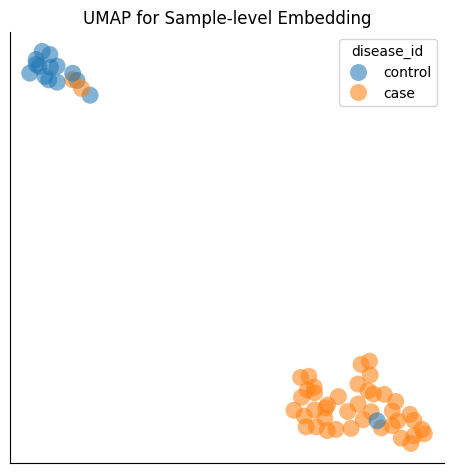

In [19]:
import umap
reducer = umap.UMAP(n_components=2, random_state=42)
embedding_umap = reducer.fit_transform(embedding_df)

fig = plt.figure(figsize=(5.6, 5.6))
sns.scatterplot(x=embedding_umap[:, 0], y=embedding_umap[:, 1],
                hue=sample_metadata[obj_test.task_key],
                s=150, linewidth=0.01, alpha=0.56)

plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.yticks([])
plt.title("UMAP for Sample-level Embedding")
sns.despine()
plt.show()

## Cell/Instance-level prioritization

In [21]:
attention_mtx_raw_df

,attention_score_raw,attention_score_norm_cellnum
cell_id,,
GTCGGGGGGTGG_Control_Participant7,0.000319,0.243156
CAAATCAATTAT_Control_Participant7,0.002341,1.783832
ATACAATTGACA_Control_Participant7,0.000933,0.710815
CTGTTAATGAGA_Control_Participant7,0.001836,1.398984
CTTCACATTATT_Control_Participant7,0.002013,1.534069
...,...,...
GCAGGGAACTCC_COVID19_Participant30,0.001604,0.186008
CAGCACCGAGCC_COVID19_Participant30,0.000905,0.104957
GCCCCTTGTGAT_COVID19_Participant30,0.002214,0.256822
